In [1]:
# 2025 08 26

In [2]:
# 데이터 클렌징 및 가공

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(np.__version__)
print(pd.__version__)

2.1.3
2.2.3


In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
bike_df = pd.read_csv('./data/bike-sharing/bike-sharing-demand/bike_train.csv')
print(bike_df.shape)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./data/bike-sharing/bike-sharing-demand/bike_train.csv')
print(bike_df.shape)
bike_df.head(10)

# 주요 컬럼 설명
# datetime: hourly date + timestamp
# season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
# holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날
# workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
# weather: 1 = 맑음, 약간 구름 낀 흐림 2 = 안개, 안개 + 흐림 3 = 가벼운 눈, 가벼운 비 + 천둥 4 = 심한 눈/비, 천둥/번개
# temp: 온도(섭씨)
# atemp: 체감온도(섭씨)
# humidity: 상대습도
# windspeed: 풍속
# casual: 사전에 등록되지 않는 사용자가 대여한 횟수
# registered: 사전에 등록된 사용자가 대여한 횟수
# count: 대여 횟수

(10886, 12)
(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
bike_df.info()      # datatime : object => String 문자      # 나머지는 숫자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# 문자열을 datetime 으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)      # bike_df['컬럼명']

# datetime 타입에서 년, 월, 일, 시간 추출해서 컬럼 끝에 추가
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


In [6]:
bike_df.info()             # datetime  : object -> datetime64[ns]로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [7]:
drop_columns = ['datetime', 'casual', 'registered']          # casual : 미등록자 대여수     registered : 등록자 대여수   
bike_df.drop(drop_columns, axis=1, inplace=True)         # axis=1 --> 열   axis=0 --> 행    

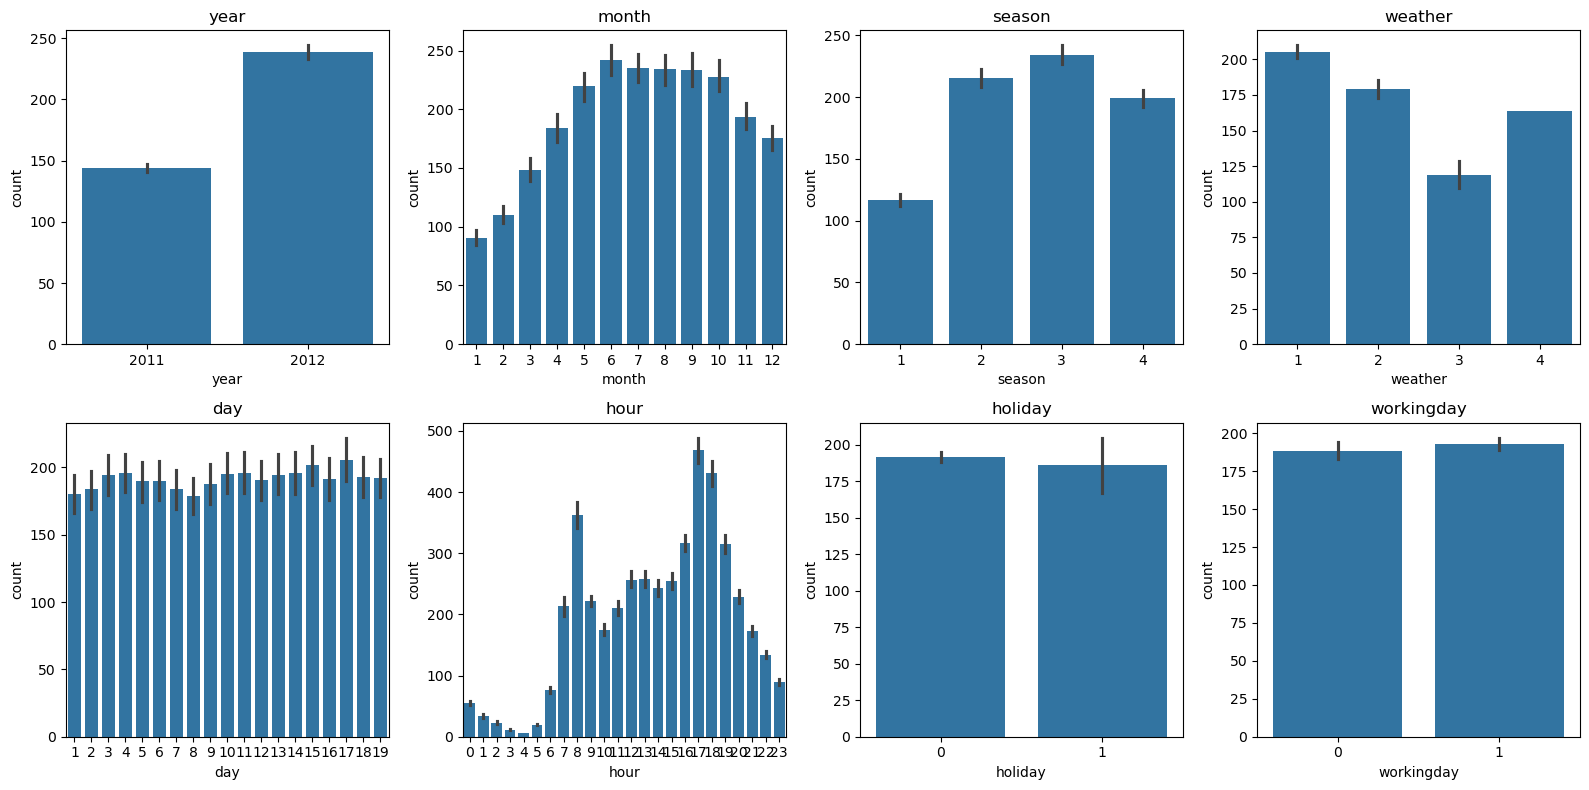

In [8]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)         # ncos : column갯수 4개   nrows : 행개수 2개
                                                                    # 즉 4개 컬럼, 2개 행으로 차트 출력

cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']        # 8개의 차트를 만들고, 각 컬럼별로 차트를 만들었다

# cat_features에 없는 모든 컬럼별로 개별 컬럼값에 따른 count 값을 borplot으로 시각화
# enumerate()는 내장함수로, for 루프 구문에 많이 사용된다.
# enumerate() 함수는, 인자로 넘어온 목록을 기준으로, 인덱스와 원소를 차례대로 접근하게 해주는 반복자(Iterator)
for i, feature in enumerate(cat_features):
    row = i // 4   # 몫 → 행 위치
    col = i % 4    # 나머지 → 열 위치
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])
    axs[row][col].set_title(feature)   # 각 그래프에 제목 달기 (추천)

plt.tight_layout()   # 간격 자동 조정
plt.show()           # 반복문 바깥에서 한 번만 호출


# 1 : year - 2012년도에 많이 증가가 되었다
# 3 : season - 여름(=2), 가을(=3) 에 증가 되었다
# 4 : weather - 날씨좋음(=1), 겨울강풍(=4)이 가장 높으니 증가되었다
# 6 : hour - 출퇴근시간 증가

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log값 반환시 NaN 등의 이슈로, log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)         # np.log1p(실제값)    # log1p : print(np.log(1e-1000 + 1)
    log_pred = np.log1p(pred)   # np.log1p(예측값)    
    squared_error = (log_y - log_pred) ** 2      # **2  --> 제곱
    rmsle = np.sqrt(np.mean(squared_error))      # np.sqrt()  --> numpy 제곱근 
    return rmsle

# 사이킷런의 mean_squared_error()는 제곱의 평균을 이용하여 RMSE를 연산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mse_val = mean_absolute_error(y, pred)    # import한 함수
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MSE:{2:.3f}'.format(rmsle_val, rmse_val, mse_val))
    # 프린트 문 출력 안되는 이유 -> 위의 함수가 '호출'되어야 출력된다!

In [10]:
# log1p, expm1 을 사용하는 이유
# - 너무 작은 값은 수치 변환 시 0으로 변환됨 log0은 -inf가 되므로 오류 발생.
# - 때문에 변환전 값에 1을 더한 값을 로그 변환 할 필요가 있으며, 이를 위해 np.log1p()를 이용
# - np.log1p()로 로그 변환된 값은 np.expm1()으로 다시 원본 변환될 수 있음. 

In [11]:
print(1e-1000 == 0.0)          # True
print(np.log(1e-1000))         # -inf   
print(np.log(1e-1000 + 1))     # log1f  # 0.0     
print(np.log1p(1e-1000))       # 0.0

True
-inf
0.0
0.0


In [12]:
var_1 = np.log1p(100)            # 변환 전 값 -> 100 가져오기
var_2 = np.expm1(var_1)          # 원본값 가져오기
print(var_1, var_2)               # 4.61512051684126 100.00000000000003

4.61512051684126 100.00000000000003


In [13]:
# 로글변환, 피처인코딩, 모델 학습 / 예측 / 평가

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Ridge : 릿지 회귀는 선형 회귀의 L2 규제를 추가한 회귀 모델이다
# Lasso : 라쏘 회귀는 서녕 회귀에 L1 규제를 추가한 회귀 모델이다

y_target = bike_df['count']    # 대여건수
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)    # 70% 학습, 30% 테스트
lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)     # 학습용 문제와 답 제공
pred = lr_reg.predict(X_test)    # 테스트용 문제를 통한 예측값

evaluate_regr(y_test, pred)       # 함수호출(테스트용 정답, 예측값)

# RMSLE: 1.165, RMSE:140.900, MSE:105.924

RMSLE: 1.165, RMSE:140.900, MSE:105.924


In [15]:
def get_top_error_data(t_test, pred, n_tops=5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['read_count'])
    result_df['predected_count'] = np.round(pred)     # 함수 호출할 때 받아온 예측값을 predcted_count라고 할당
    result_df['diff'] = np.abs(result_df['read_count'] - result_df['predected_count'])

    
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])    # 5건 정렬

# 함수 호출
get_top_error_data(y_test, pred, n_tops=5)


#          실제값       예측값                   --> 차이가 가장 큰 순서대로 5건 가져옴
#       read_count  predected_count   diff
# 1618         890            322.0  568.0
# 966          884            327.0  557.0
# 3151         798            241.0  557.0
# 412          745            194.0  551.0
# 2817         856            310.0  546.0

      read_count  predected_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


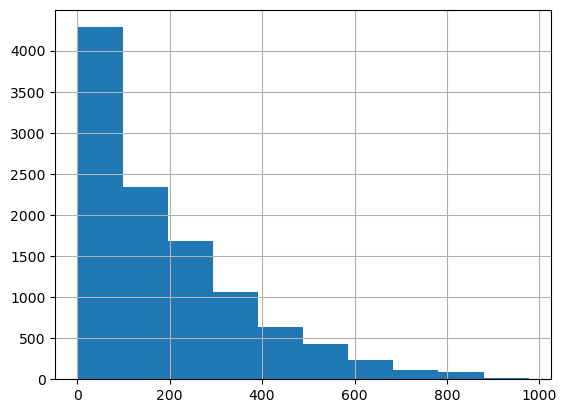

In [16]:
y_target.hist()
plt.show()

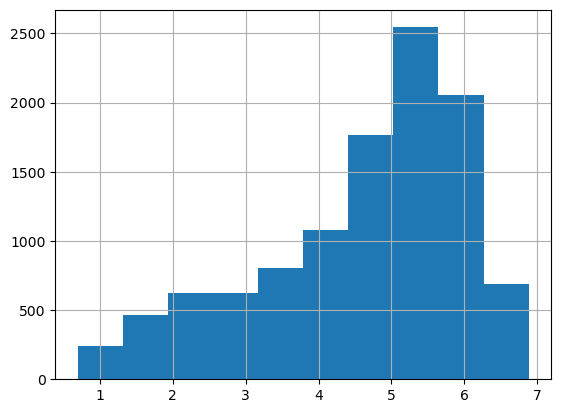

In [17]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()
plt.show()

In [18]:
# 타겟 컬럼인 count값을 log1p로 로그변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)    # 70% 학습, 30% 테스트
lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)     # 학습용 문제와 답 제공
pred = lr_reg.predict(X_test)    # 테스트용 문제를 통한 예측값

# 테스트 데이터셋의 Target값은 Log 변환 되었으므로 다시 expm1을 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 log변환된 타겟 기반으로 학습되어 예측되었으므로, 다시 expm1을 이용하여 원래 scale로 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)       # 함수호출(테스트용 정답, 예측값)


# RMSLE: 1.017, RMSE:162.594, MSE:109.286

RMSLE: 1.017, RMSE:162.594, MSE:109.286


In [20]:
pred_exp
# array([308.63045453, 161.17120235, 146.5153226 , ..., 351.91134842,
       153.35179351,  74.17859374])

IndentationError: unexpected indent (1131508174.py, line 3)

In [21]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef.sort_values(ascending=False)

# year          0.418513
# hour          0.098348
# month         0.076839
# atemp         0.030857
# temp          0.011712
# windspeed     0.003961
# day           0.003353
# humidity     -0.014512
# weather      -0.014733
# season       -0.044525
# holiday      -0.046010
# workingday   -0.066383
# dtype: float64

year          0.418513
hour          0.098348
month         0.076839
atemp         0.030857
temp          0.011712
windspeed     0.003961
day           0.003353
humidity     -0.014512
weather      -0.014733
season       -0.044525
holiday      -0.046010
workingday   -0.066383
dtype: float64

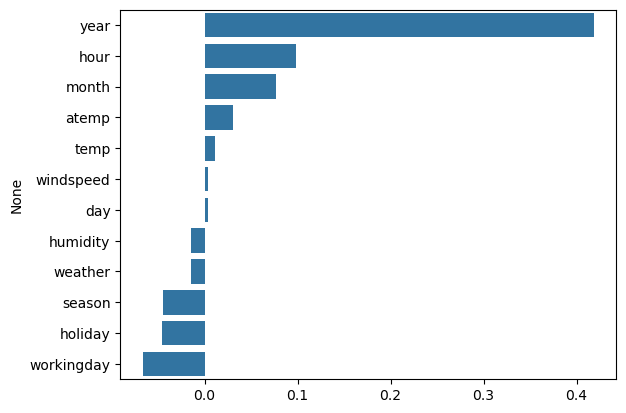

In [22]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

plt.show()

In [23]:
# 핫코딩
# 원-핫 인코딩(One-Hot Encoding)이란? 
# 원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 
# 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다.


# 'year', 'month', 'day', 'hour' 등의 피처들을 One-Hot Encoding 적용
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])


In [24]:
X_features_ohe.head(10)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
5,9.84,12.880,75,6.0032,True,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
6,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
7,8.20,12.880,86,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
8,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
9,13.12,17.425,76,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False


In [27]:
# 원-핫 인코딩이 적용된 feature 데이터셋 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)    # 70% 학습, 30% 테스트
lr_reg = LinearRegression()

# 모델과 학습/테스트 데이터셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)     # 학습 (학습용문제, 학습용 정답 부여)
    pred = model.predict(X_test)    # 테스트용 문제를 통한 예측값
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)    # 함수호출(테스트용정답, 예측값)


# 모델별로 평가 수행
lr_reg=LinearRegression()
redge_reg = Ridge(alpha=10)
rasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, redge_reg, rasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)    # 호출



# 원-핫 인코딩이 적용된 feature 데이터셋 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)


# ### LinearRegression ###
# RMSLE: 0.590, RMSE:97.688, MSE:63.382
# ### Ridge ###
# RMSLE: 0.590, RMSE:98.529, MSE:63.893
# ### Lasso ###
# RMSLE: 0.635, RMSE:113.219, MSE:72.803

### LinearRegression ###
RMSLE: 0.590, RMSE:97.688, MSE:63.382
### Ridge ###
RMSLE: 0.590, RMSE:98.529, MSE:63.893
### Lasso ###
RMSLE: 0.635, RMSE:113.219, MSE:72.803


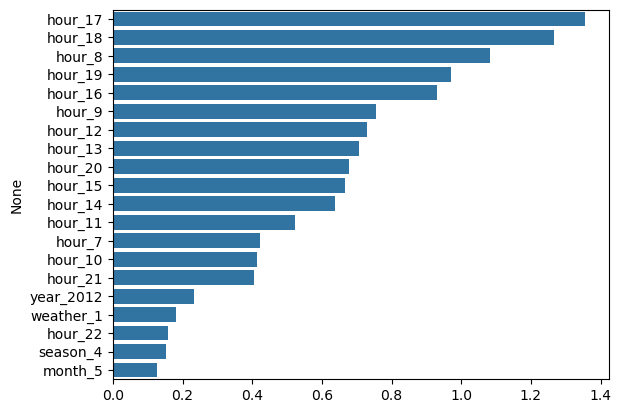

In [29]:
# one-hot encoding
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]      # 20 개만 
sns.barplot(x=coef_sort.values, y=coef_sort.index)

plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xbg_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xbg_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)


# ### RandomForestRegressor ###
# RMSLE: 0.354, RMSE:50.325, MSE:31.156
# ### GradientBoostingRegressor ###
# RMSLE: 0.330, RMSE:53.346, MSE:32.745
# ### XGBRegressor ###
# RMSLE: 0.339, RMSE:51.475, MSE:31.357
# ### LGBMRegressor ###
# RMSLE: 0.319, RMSE:47.215, MSE:29.029

### RandomForestRegressor ###
RMSLE: 0.354, RMSE:50.325, MSE:31.156
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE:53.346, MSE:32.745
### XGBRegressor ###
RMSLE: 0.339, RMSE:51.475, MSE:31.357


D:\DEV05\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### LGBMRegressor ###
RMSLE: 0.319, RMSE:47.215, MSE:29.029


D:\DEV05\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
